#                            BIKE ASSIGNMET- ML MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike=pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<span style="color: purple">We can see that there are no null values in any column</span> 

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike.ndim

2

In [7]:
bike.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [8]:
bike.shape

(730, 16)

In [9]:
bike.size

11680

<span style="color: purple">There are 730 columns and 16 rows in the data set, with a total of 11680 values</span>.

# Filtering Data

In [10]:
## Dropping columns which are not relevant
bike.drop(['instant'],axis=1,inplace=True) ## instant is just index no.
bike.drop(['dteday'],axis=1,inplace=True) ## dteday is showing date which already have in columns month,year etc
bike.drop(['casual'],axis=1,inplace=True) # casual+registered is already there in cnt... so not required
bike.drop(['registered'],axis=1,inplace=True)

In [11]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


<Axes: >

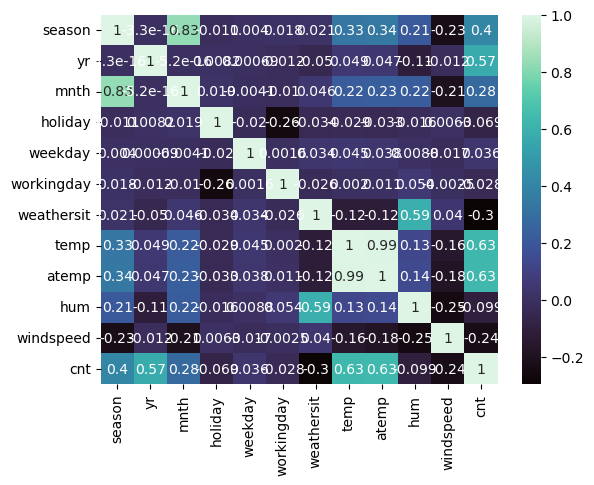

In [12]:
#Checking correlation with other variables
sns.heatmap(bike.corr(),annot=True,cmap="mako")

<font color='purple'> We can see that atemp and temp are highly correlated 
                     <br> temp,atemp and cnt are also correlated </font>

# EDA

In [13]:
#Converting season,month,weekday,weathersit to categorical values

bike.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"}, inplace=True)
bike.weathersit.replace({1:"good",2:"moderate",3:"bad",4:"severe"}, inplace=True)
bike.weekday.replace({0:'sun',1:"mon",2:"tue",3:"wed",4:"thurs",5:"fri",6:"sat"}, inplace=True)
bike.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Analysing Categorical Variable with Target Variable

In [14]:
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in enumerate(vars_cat):
    print(i)

(0, 'season')
(1, 'yr')
(2, 'mnth')
(3, 'holiday')
(4, 'weekday')
(5, 'workingday')
(6, 'weathersit')


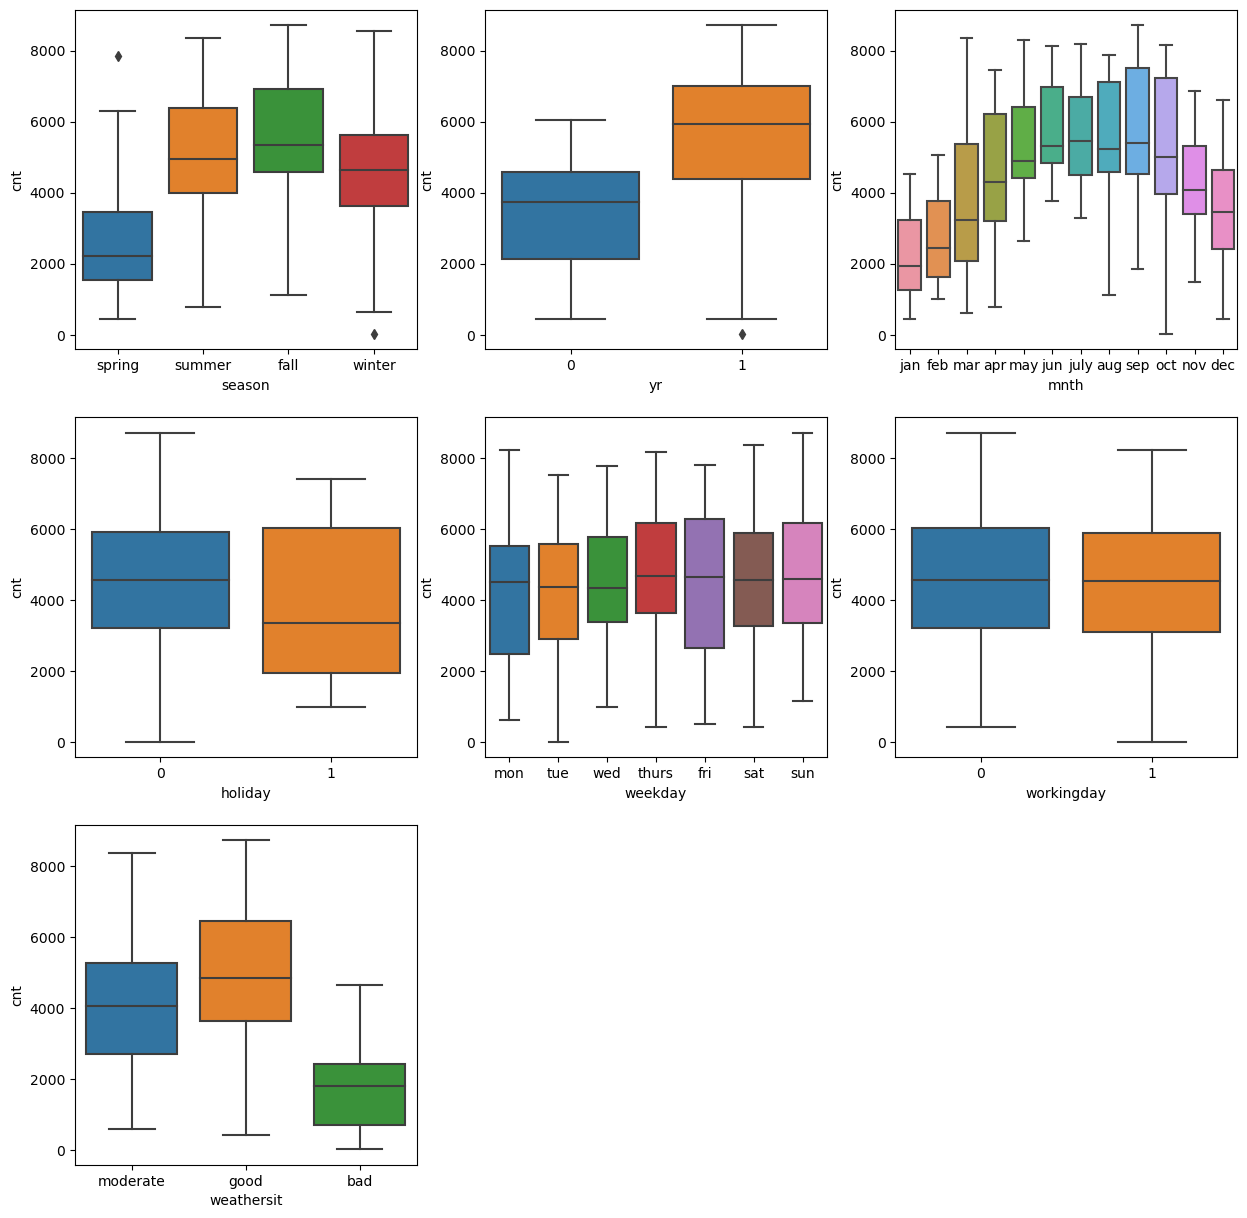

In [15]:
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike,x=i[1],y='cnt')
plt.show()

<font color='purple'> 1. Bike hire numbers are maximum during fall
    <br> 2. 2019 year sees a boom in bike hirers
    <br> 3. September gets maximum bike hirers and January least
    <br> 4.There is not much difference in bike hires number, even if there is a holiday
    <br> 5.Good weather accounts for hire bike numbers

In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Creating Dummy Variables

In [17]:
# This line will create dummies and will remove the original column name
bike=pd.get_dummies(data=bike,columns=['season','mnth','weekday','weathersit'])

In [18]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,False,True,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,False,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,True,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,True,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,True,...,True,False,False,False,False,False,False,False,True,False


In [19]:
# Checking all dummy variables
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_apr', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [20]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_fall          730 non-null    bool   
 9   season_spring        730 non-null    bool   
 10  season_summer        730 non-null    bool   
 11  season_winter        730 non-null    bool   
 12  mnth_apr             730 non-null    bool   
 13  mnth_aug             730 non-null    bool   
 14  mnth_dec             730 non-null    bool   
 15  mnth_feb             730 non-null    boo

# Model Building

### Converting all the object type columns to float as later object type columns can give error in calculating VIF

In [21]:
bike['season_fall']=bike['season_fall'].astype(float)
bike['season_spring']=bike['season_spring'].astype(float)
bike['season_summer']=bike['season_summer'].astype(float)
bike['season_winter']=bike['season_winter'].astype(float)
bike['mnth_jan']=bike['mnth_jan'].astype(float)
bike['mnth_feb']=bike['mnth_feb'].astype(float)
bike['mnth_mar']=bike['mnth_mar'].astype(float)
bike['mnth_apr']=bike['mnth_apr'].astype(float)
bike['mnth_may']=bike['mnth_may'].astype(float)
bike['mnth_jun']=bike['mnth_jun'].astype(float)
bike['mnth_july']=bike['mnth_july'].astype(float)
bike['mnth_aug']=bike['mnth_aug'].astype(float)
bike['mnth_sep']=bike['mnth_sep'].astype(float)
bike['mnth_oct']=bike['mnth_oct'].astype(float)
bike['mnth_nov']=bike['mnth_nov'].astype(float)
bike['mnth_dec']=bike['mnth_dec'].astype(float)
bike['weekday_mon']=bike['weekday_mon'].astype(float)
bike['weekday_tue']=bike['weekday_tue'].astype(float)
bike['weekday_wed']=bike['weekday_wed'].astype(float)
bike['weekday_thurs']=bike['weekday_thurs'].astype(float)
bike['weekday_fri']=bike['weekday_fri'].astype(float)
bike['weekday_sat']=bike['weekday_sat'].astype(float)
bike['weekday_sun']=bike['weekday_sun'].astype(float)
bike['weathersit_bad']=bike['weathersit_bad'].astype(float)
bike['weathersit_good']=bike['weathersit_good'].astype(float)
bike['weathersit_moderate']=bike['weathersit_moderate'].astype(float)

In [22]:
# Splitting the data into training and data set

from sklearn.model_selection import train_test_split

y=bike.pop('cnt') # y will contain only the target variable
X=bike # x will contain all other variables except target variable



In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=42) # we need to specify random_state, so that we will always get same rows for train and test data

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 683 to 435
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   season_fall          510 non-null    float64
 8   season_spring        510 non-null    float64
 9   season_summer        510 non-null    float64
 10  season_winter        510 non-null    float64
 11  mnth_apr             510 non-null    float64
 12  mnth_aug             510 non-null    float64
 13  mnth_dec             510 non-null    float64
 14  mnth_feb             510 non-null    float64
 15  mnth_jan             510 non-null    float6

In [25]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 510 entries, 683 to 435
Series name: cnt
Non-Null Count  Dtype
--------------  -----
510 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


In [26]:
print(X_train.shape)
print(X_test.shape)

(510, 33)
(219, 33)


## Scaling Continuous Variables

In [27]:
# We need to scale variables like hum,windspeed,temp,atemp

from sklearn.preprocessing import MinMaxScaler #importing the necessary library
num_vars=['temp','atemp','windspeed','hum']
scaler=MinMaxScaler()
X_train[num_vars]= scaler.fit_transform(X_train[num_vars])

In [28]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# RFE and Automation ( Filtering columns on the basis of RFE)

RFE stands for Recursive Feature Elimination, RFE will show us which features can be important for this model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
lr=LinearRegression()  # we are creating a LinearRegression Model usking sklearn for RFE
lr.fit(X_train,y_train)


LinearRegression()

In [30]:
# We will take top 15 columns
from sklearn.feature_selection import RFE
rfe= RFE(lr)
#rfe.fit(X_train,y_train)

In [31]:
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 17),
 ('workingday', False, 18),
 ('temp', False, 16),
 ('atemp', True, 1),
 ('hum', False, 14),
 ('windspeed', False, 15),
 ('season_fall', False, 11),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_apr', False, 9),
 ('mnth_aug', False, 13),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 4),
 ('mnth_july', True, 1),
 ('mnth_jun', False, 2),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 3),
 ('mnth_sep', True, 1),
 ('weekday_fri', False, 7),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 5),
 ('weekday_thurs', False, 8),
 ('weekday_tue', True, 1),
 ('weekday_wed', True, 1),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [32]:
X_train.columns[rfe.support_]

Index(['yr', 'atemp', 'season_spring', 'season_winter', 'mnth_dec',
       'mnth_july', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sep',
       'weekday_mon', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

# Manual Elimination

In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
def model_new(cols):
    X_train_sm= sm.add_constant(X_train[cols])
    lm=sm.OLS(y_train,X_train_sm)
    lm.fit()
    print(lm.summary())
    return lm

In [35]:
def cal_vif(cols):
    df1=X_train[cols]
    vif=pd.dataFrame()
    vif['Features']=df1.columns
    vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range (df1.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [36]:
# Print columns selected by RFE
# Now we will eliminate manually to build a good model.
X_train.columns[rfe.support_]

Index(['yr', 'atemp', 'season_spring', 'season_winter', 'mnth_dec',
       'mnth_july', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sep',
       'weekday_mon', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [37]:
X_train_rfe=X_train[['yr', 'temp','holiday', 'season_spring', 'season_winter', 'mnth_dec',
       'mnth_july', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_sep',
       'weekday_mon', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate']]
# Note- we are taking temp instead of atemp as we have seen that temp and atemp are highly correlated.
# We have also taken holiday, although it was not selected by rfe in top 15 features. It is because of general knowledge that holiday can be a significant factor for bike rentals

In [38]:
X_train_rfe

,yr,temp,holiday,season_spring,season_winter,mnth_dec,mnth_july,mnth_mar,mnth_may,mnth_nov,mnth_sep,weekday_mon,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0.327133,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
645,1,0.403972,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
163,0,0.717562,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
360,0,0.331287,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
640,1,0.745598,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1,0.359323,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
71,0,0.405237,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
106,0,0.495350,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
270,0,0.717562,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Model Building

### MODEL 1 
#### ( We are considering RFE chosen features first)

In [39]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Add a constant
X_train_lm1= sm.add_constant(X_train_rfe)
X_train_lm1
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit() # fitting the training set

In [40]:

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']= X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
15,weathersit_good,22.83
16,weathersit_moderate,12.79
1,temp,3.40
3,season_spring,3.04
4,season_winter,2.26
14,weathersit_bad,1.85
9,mnth_nov,1.73
6,mnth_july,1.43
5,mnth_dec,1.28
8,mnth_may,1.22


In [41]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     156.1
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          3.47e-181
Time:                        21:49:25   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     493   BIC:                             8353.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 871.2916    160.481      5.429      0.000     555.981    1186.602
yr                   1996.6961     71.304     28.002      0.000    1856.598    2136.794
temp                 3454.9341    287.451     12.019      0.000    2890.154    4019.714
holiday              -498.4330    226.232     -2.203      0.028    -942.930     -53.936
season_spring       -1274.4971    146.266     -8.714      0.000   -1561.878    -987.116
season_winter         817.1043    122.788      6.655      0.000     575.852    1058.356
mnth_dec             -510.6273    152.321     -3.352      0.001    -809.905    -211.349
mnth_july            -329.3918    146.097     -2.255      0.025    -616.441     -42.343
mnth_mar              430.4838    155.311      2.772      0.006     125.331     735.637
mnth_may              252.3947    135.301      1.865      0.063     -13.443     518.232
mnth_nov             -697.8668    161.007     -4.334      0.000   -1014.212    -381.522
mnth_sep              471.2869    133.608      3.527      0.000     208.776     733.798
weekday_mon          -320.0253    104.260     -3.069      0.002    -524.874    -115.176
weekday_tue          -255.7709    102.230     -2.502      0.013    -456.632     -54.910
weekday_wed          -258.2614    112.684     -2.292      0.022    -479.661     -36.862
weathersit_bad      -1066.5082    162.206     -6.575      0.000   -1385.209    -747.808
weathersit_good      1316.9385     87.171     15.108      0.000    1145.666    1488.211
weathersit_moderate   620.8613     89.932      6.904      0.000     444.164     797.558
==============================================================================
Omnibus:                       73.651   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.950
Skew:                          -0.767   Prob(JB):                     2.06e-37
Kurtosis:                       5.366   Cond. No.                     8.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# dropping month may due to its high p-value
X_train_rfe.drop(['mnth_may'],axis=1,inplace=True)


### Model 2

In [43]:
X_train_lm2=sm.add_constant(X_train_rfe)
lr2=sm.OLS(y_train,X_train_lm2)
lr2=lr2.fit()

In [44]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
14,weathersit_good,22.21
15,weathersit_moderate,12.39
1,temp,3.40
3,season_spring,2.89
4,season_winter,2.13
13,weathersit_bad,1.83
8,mnth_nov,1.73
6,mnth_july,1.35
5,mnth_dec,1.28
12,weekday_wed,1.17


In [45]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.5
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.49e-181
Time:                        21:49:25   Log-Likelihood:                -4125.5
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     494   BIC:                             8351.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 919.1051    158.818      5.787      0.000     607.064    1231.146
yr                   1999.6865     71.465     27.981      0.000    1859.273    2140.100
temp                 3449.1106    288.155     11.970      0.000    2882.951    4015.270
holiday              -496.0647    226.795     -2.187      0.029    -941.667     -50.462
season_spring       -1334.3050    143.066     -9.326      0.000   -1615.398   -1053.212
season_winter         762.1264    119.497      6.378      0.000     527.341     996.912
mnth_dec             -519.5004    152.628     -3.404      0.001    -819.381    -219.620
mnth_july            -391.6288    142.593     -2.746      0.006    -671.792    -111.466
mnth_mar              402.3482    154.964      2.596      0.010      97.878     706.819
mnth_nov             -707.8136    161.322     -4.388      0.000   -1024.776    -390.851
mnth_sep              421.5610    131.250      3.212      0.001     163.684     679.438
weekday_mon          -327.0570    104.453     -3.131      0.002    -532.284    -121.830
weekday_tue          -258.8416    102.473     -2.526      0.012    -460.179     -57.504
weekday_wed          -254.9472    112.952     -2.257      0.024    -476.873     -33.022
weathersit_bad      -1059.5770    162.570     -6.518      0.000   -1378.991    -740.163
weathersit_good      1334.7939     86.861     15.367      0.000    1164.131    1505.457
weathersit_moderate   643.8882     89.304      7.210      0.000     468.426     819.351
==============================================================================
Omnibus:                       71.716   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.697
Skew:                          -0.758   Prob(JB):                     2.10e-35
Kurtosis:                       5.284   Cond. No.                     8.61e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
# Dropping holiday due to its high p-value and negative coefficient
X_train_rfe.drop(['holiday'],axis=1,inplace=True)

### MODEL 3

In [47]:
X_train_lm3=sm.add_constant(X_train_rfe)
lr3=sm.OLS(y_train,X_train_lm3)
lr3=lr3.fit()

In [48]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
13,weathersit_good,22.21
14,weathersit_moderate,12.39
1,temp,3.40
2,season_spring,2.88
3,season_winter,2.13
12,weathersit_bad,1.83
7,mnth_nov,1.73
5,mnth_july,1.35
4,mnth_dec,1.27
6,mnth_mar,1.12


In [49]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.18e-181
Time:                        21:49:25   Log-Likelihood:                -4127.9
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     495   BIC:                             8349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 922.4783    159.416      5.787      0.000     609.263    1235.694
yr                   1996.8680     71.726     27.840      0.000    1855.943    2137.793
temp                 3455.1487    289.241     11.946      0.000    2886.858    4023.439
season_spring       -1351.8974    143.385     -9.428      0.000   -1633.616   -1070.179
season_winter         758.6403    119.943      6.325      0.000     522.981     994.300
mnth_dec             -531.7321    153.108     -3.473      0.001    -832.553    -230.911
mnth_july            -394.0814    143.132     -2.753      0.006    -675.303    -112.860
mnth_mar              412.1132    155.491      2.650      0.008     106.609     717.617
mnth_nov             -719.0817    161.855     -4.443      0.000   -1037.090    -401.074
mnth_sep              415.7542    131.724      3.156      0.002     156.948     674.561
weekday_mon          -322.0547    104.827     -3.072      0.002    -528.015    -116.095
weekday_tue          -272.2975    102.679     -2.652      0.008    -474.037     -70.558
weekday_wed          -317.3742    109.704     -2.893      0.004    -532.916    -101.832
weathersit_bad      -1053.2370    163.164     -6.455      0.000   -1373.817    -732.657
weathersit_good      1330.1939     87.167     15.260      0.000    1158.931    1501.457
weathersit_moderate   645.5214     89.641      7.201      0.000     469.397     821.646
==============================================================================
Omnibus:                       76.555   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.917
Skew:                          -0.826   Prob(JB):                     1.14e-35
Kurtosis:                       5.201   Cond. No.                     8.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
# dropping weekday_tue due to its high p-value and negative coefficient
X_train_rfe.drop(['weekday_tue'],axis=1,inplace=True)

### MODEL 4

In [51]:
X_train_lm4=sm.add_constant(X_train_rfe)
lr4=sm.OLS(y_train,X_train_lm4)
lr4=lr4.fit()

In [52]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
12,weathersit_good,21.66
13,weathersit_moderate,12.03
1,temp,3.39
2,season_spring,2.88
3,season_winter,2.13
11,weathersit_bad,1.82
7,mnth_nov,1.73
5,mnth_july,1.35
4,mnth_dec,1.27
6,mnth_mar,1.12


In [53]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.3
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          2.73e-181
Time:                        21:49:25   Log-Likelihood:                -4131.5
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     496   BIC:                             8350.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 864.2401    158.853      5.440      0.000     552.132    1176.349
yr                   1995.1284     72.158     27.649      0.000    1853.355    2136.901
temp                 3508.8307    290.281     12.088      0.000    2938.499    4079.162
season_spring       -1352.1312    144.254     -9.373      0.000   -1635.556   -1068.706
season_winter         762.9191    120.659      6.323      0.000     525.854     999.985
mnth_dec             -522.2188    153.994     -3.391      0.001    -824.779    -219.659
mnth_july            -409.9476    143.874     -2.849      0.005    -692.626    -127.269
mnth_mar              425.5329    156.351      2.722      0.007     118.341     732.724
mnth_nov             -709.3937    162.795     -4.358      0.000   -1029.247    -389.541
mnth_sep              412.8027    132.518      3.115      0.002     152.438     673.168
weekday_mon          -261.3866    102.920     -2.540      0.011    -463.600     -59.173
weekday_wed          -256.4861    107.924     -2.377      0.018    -468.531     -44.441
weathersit_bad      -1042.3788    164.102     -6.352      0.000   -1364.799    -719.958
weathersit_good      1299.8081     86.935     14.952      0.000    1129.003    1470.614
weathersit_moderate   606.8107     88.981      6.820      0.000     431.984     781.637
==============================================================================
Omnibus:                       72.352   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.942
Skew:                          -0.792   Prob(JB):                     4.55e-33
Kurtosis:                       5.121   Cond. No.                     8.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.69e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
# dropping weekday_wed due to its high p-value and negative coefficient
X_train_rfe.drop(['weekday_wed'],axis=1,inplace=True)

### MODEL 5

In [55]:
X_train_lm5=sm.add_constant(X_train_rfe)
lr5=sm.OLS(y_train,X_train_lm5)
lr5=lr5.fit()

In [56]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
11,weathersit_good,21.48
12,weathersit_moderate,11.90
1,temp,3.39
2,season_spring,2.88
3,season_winter,2.13
10,weathersit_bad,1.81
7,mnth_nov,1.73
5,mnth_july,1.35
4,mnth_dec,1.27
8,mnth_sep,1.12


In [57]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          3.09e-181
Time:                        21:49:25   Log-Likelihood:                -4134.4
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     497   BIC:                             8350.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 830.2030    158.945      5.223      0.000     517.917    1142.489
yr                   1996.1818     72.493     27.536      0.000    1853.751    2138.613
temp                 3506.7822    291.634     12.025      0.000    2933.795    4079.769
season_spring       -1350.6446    144.926     -9.320      0.000   -1635.388   -1065.902
season_winter         771.8334    121.163      6.370      0.000     533.778    1009.888
mnth_dec             -515.1787    154.683     -3.331      0.001    -819.093    -211.265
mnth_july            -412.6393    144.541     -2.855      0.004    -696.626    -128.653
mnth_mar              469.9542    155.954      3.013      0.003     163.544     776.364
mnth_nov             -705.0856    163.544     -4.311      0.000   -1026.409    -383.762
mnth_sep              425.3573    133.030      3.197      0.001     163.987     686.728
weekday_mon          -219.9815    101.908     -2.159      0.031    -420.205     -19.758
weathersit_bad      -1048.1937    164.849     -6.359      0.000   -1372.081    -724.307
weathersit_good      1289.0530     87.222     14.779      0.000    1117.684    1460.422
weathersit_moderate   589.3437     89.091      6.615      0.000     414.302     764.385
==============================================================================
Omnibus:                       75.630   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.710
Skew:                          -0.811   Prob(JB):                     7.68e-36
Kurtosis:                       5.232   Cond. No.                     8.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
# dropping weekday_mon due to its high p-value and negative coefficient
X_train_rfe.drop(['weekday_mon'],axis=1,inplace=True)

### MODEL 6

In [59]:
X_train_lm6=sm.add_constant(X_train_rfe)
lr6=sm.OLS(y_train,X_train_lm6)
lr6=lr6.fit()

In [60]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
10,weathersit_good,21.02
11,weathersit_moderate,11.69
1,temp,3.37
2,season_spring,2.88
3,season_winter,2.13
9,weathersit_bad,1.77
7,mnth_nov,1.73
5,mnth_july,1.35
4,mnth_dec,1.27
8,mnth_sep,1.12


In [61]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          2.07e-181
Time:                        21:49:25   Log-Likelihood:                -4136.8
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 776.1172    157.533      4.927      0.000     466.606    1085.628
yr                   1996.0385     72.759     27.434      0.000    1853.086    2138.991
temp                 3556.0154    291.807     12.186      0.000    2982.691    4129.340
season_spring       -1338.7465    145.352     -9.210      0.000   -1624.326   -1053.167
season_winter         776.6263    121.587      6.387      0.000     537.739    1015.513
mnth_dec             -513.6032    155.249     -3.308      0.001    -818.627    -208.580
mnth_july            -421.6666    145.010     -2.908      0.004    -706.574    -136.759
mnth_mar              493.5195    156.142      3.161      0.002     186.742     800.297
mnth_nov             -695.8016    164.088     -4.240      0.000   -1018.191    -373.412
mnth_sep              425.8492    133.518      3.189      0.002     163.522     688.177
weathersit_bad      -1082.4038    164.687     -6.572      0.000   -1405.971    -758.836
weathersit_good      1276.5431     87.348     14.614      0.000    1104.927    1448.160
weathersit_moderate   581.9779     89.352      6.513      0.000     406.424     757.531
==============================================================================
Omnibus:                       80.587   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.503
Skew:                          -0.865   Prob(JB):                     1.56e-37
Kurtosis:                       5.233   Cond. No.                     8.78e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
# dropping mnth_july due to its high p-value and negative coefficient
X_train_rfe.drop(['mnth_july'],axis=1,inplace=True)

### MODEL 7

In [63]:
X_train_lm7=sm.add_constant(X_train_rfe)
lr7=sm.OLS(y_train,X_train_lm7)
lr7=lr7.fit()

In [64]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
9,weathersit_good,19.85
10,weathersit_moderate,10.91
1,temp,2.87
2,season_spring,2.83
3,season_winter,2.12
8,weathersit_bad,1.74
6,mnth_nov,1.72
4,mnth_dec,1.27
5,mnth_mar,1.10
7,mnth_sep,1.07


In [65]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.9
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          8.61e-181
Time:                        21:49:25   Log-Likelihood:                -4141.1
No. Observations:                 510   AIC:                             8304.
Df Residuals:                     499   BIC:                             8351.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 881.5257    154.446      5.708      0.000     578.080    1184.971
yr                   1990.2241     73.273     27.162      0.000    1846.263    2134.185
temp                 3230.7024    271.515     11.899      0.000    2697.248    3764.156
season_spring       -1391.2991    145.298     -9.576      0.000   -1676.770   -1105.828
season_winter         793.1223    122.359      6.482      0.000     552.721    1033.524
mnth_dec             -540.7194    156.122     -3.463      0.001    -847.457    -233.982
mnth_mar              518.3289    157.069      3.300      0.001     209.731     826.927
mnth_nov             -730.9981    164.858     -4.434      0.000   -1054.900    -407.096
mnth_sep              505.2512    131.668      3.837      0.000     246.559     763.944
weathersit_bad      -1068.0812    165.839     -6.440      0.000   -1393.910    -742.253
weathersit_good      1314.8881     86.990     15.115      0.000    1143.977    1485.799
weathersit_moderate   634.7189     88.143      7.201      0.000     461.542     807.896
==============================================================================
Omnibus:                       85.290   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.478
Skew:                          -0.911   Prob(JB):                     1.06e-39
Kurtosis:                       5.265   Cond. No.                     9.06e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
# dropping mnth_dec due to its comparitively high p-value and negative coefficient
X_train_rfe.drop(['mnth_dec'],axis=1,inplace=True)

### MODEL 8

In [67]:
X_train_lm8=sm.add_constant(X_train_rfe)
lr8=sm.OLS(y_train,X_train_lm8)
lr8=lr8.fit()

In [68]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
8,weathersit_good,19.22
9,weathersit_moderate,10.48
2,season_spring,2.83
1,temp,2.77
3,season_winter,1.98
7,weathersit_bad,1.69
5,mnth_nov,1.55
4,mnth_mar,1.08
6,mnth_sep,1.07
0,yr,1.01


In [69]:
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.9
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.94e-179
Time:                        21:49:25   Log-Likelihood:                -4147.1
No. Observations:                 510   AIC:                             8314.
Df Residuals:                     500   BIC:                             8357.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 774.4260    152.974      5.062      0.000     473.875    1074.977
yr                   1980.8459     74.024     26.760      0.000    1835.410    2126.281
temp                 3411.8835    269.342     12.667      0.000    2882.703    3941.064
season_spring       -1384.6395    146.874     -9.427      0.000   -1673.205   -1096.074
season_winter         681.3376    119.316      5.710      0.000     446.916     915.760
mnth_mar              577.3572    157.849      3.658      0.000     267.228     887.486
mnth_nov             -553.4708    158.401     -3.494      0.001    -864.684    -242.257
mnth_sep              544.6547    132.610      4.107      0.000     284.112     805.197
weathersit_bad      -1122.9873    166.885     -6.729      0.000   -1450.869    -795.106
weathersit_good      1294.8394     87.746     14.757      0.000    1122.443    1467.236
weathersit_moderate   602.5739     88.612      6.800      0.000     428.477     776.671
==============================================================================
Omnibus:                       75.472   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.499
Skew:                          -0.864   Prob(JB):                     5.11e-31
Kurtosis:                       4.891   Cond. No.                     8.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
# dropping mnth_nov due to its comparitively high p-value and negative coefficient
X_train_rfe.drop(['mnth_nov'],axis=1,inplace=True)

### MODEL 9

In [71]:
X_train_lm9=sm.add_constant(X_train_rfe)
lr9=sm.OLS(y_train,X_train_lm9)
lr9=lr9.fit()

In [72]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
7,weathersit_good,18.20
8,weathersit_moderate,10.13
2,season_spring,2.75
1,temp,2.64
3,season_winter,1.70
6,weathersit_bad,1.67
4,mnth_mar,1.08
5,mnth_sep,1.06
0,yr,1.01


In [73]:
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.7
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          4.61e-178
Time:                        21:49:25   Log-Likelihood:                -4153.3
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     501   BIC:                             8363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 678.5278    152.166      4.459      0.000     379.566     977.490
yr                   1987.6652     74.821     26.566      0.000    1840.664    2134.667
temp                 3611.5601    266.138     13.570      0.000    3088.677    4134.443
season_spring       -1295.5312    146.252     -8.858      0.000   -1582.874   -1008.189
season_winter         525.3408    111.879      4.696      0.000     305.531     745.151
mnth_mar              577.0550    159.605      3.616      0.000     263.478     890.632
mnth_sep              589.9637    133.443      4.421      0.000     327.787     852.141
weathersit_bad      -1116.1185    168.729     -6.615      0.000   -1447.623    -784.614
weathersit_good      1227.1667     86.534     14.181      0.000    1057.152    1397.181
weathersit_moderate   567.4796     89.020      6.375      0.000     392.581     742.378
==============================================================================
Omnibus:                       74.905   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.283
Skew:                          -0.851   Prob(JB):                     2.09e-31
Kurtosis:                       4.938   Cond. No.                     8.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
# dropping weathersit_good due its high VIF value, since p-value is 0 for all the columns now so according to that all the variables are significant now
X_train_rfe.drop(['weathersit_good'],axis=1,inplace=True)

### MODEL 10

In [75]:
X_train_lm10=sm.add_constant(X_train_rfe)
lr10=sm.OLS(y_train,X_train_lm10)
lr10=lr10.fit()

In [76]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,temp,2.31
0,yr,2.07
7,weathersit_moderate,1.52
2,season_spring,1.30
3,season_winter,1.30
5,mnth_sep,1.16
4,mnth_mar,1.15
6,weathersit_bad,1.05


In [77]:
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.7
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          4.61e-178
Time:                        21:49:26   Log-Likelihood:                -4153.3
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     501   BIC:                             8363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1905.6946    200.723      9.494      0.000    1511.333    2300.056
yr                   1987.6652     74.821     26.566      0.000    1840.664    2134.667
temp                 3611.5601    266.138     13.570      0.000    3088.677    4134.443
season_spring       -1295.5312    146.252     -8.858      0.000   -1582.874   -1008.189
season_winter         525.3408    111.879      4.696      0.000     305.531     745.151
mnth_mar              577.0550    159.605      3.616      0.000     263.478     890.632
mnth_sep              589.9637    133.443      4.421      0.000     327.787     852.141
weathersit_bad      -2343.2852    224.449    -10.440      0.000   -2784.262   -1902.308
weathersit_moderate  -659.6871     79.514     -8.296      0.000    -815.909    -503.465
==============================================================================
Omnibus:                       74.905   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.283
Skew:                          -0.851   Prob(JB):                     2.09e-31
Kurtosis:                       4.938   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2><font color='purple'> This model looks good. All p-values are 0 and vif values are also under 5 </font></h2

## Hypothesis Testing

<h4>Hypothesis Testing states that we can reject NULL Hypothesis if any of the coefficient is equal to 0</h4>
<h5><font color='blue'> We can see from summary of model 10 that none of our coefficient is 0, so we can easily reject the null hypothesis </font> </h5>

## F-statistics

<h4> F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is </h4>
<h5><font color='blue'> We can see that F-statistic is 275.7 in model 10 and Prob(F-Statistic)~0 so overall model is significant</font></h5>    

## Significance of Coefficients

<font color='black'> Suppose any feature has 'X' coefficient then it signifies that unit increase in that feature will increase the bike hire numbers by 'X' units. But if coefficient is negative than it will decrease the bike hire numbers by 'X' units. </font>  

## Error Terms Distribution and Residual Analysis

#### Error terms should be normally distributed with mean 0

<Axes: ylabel='Density'>

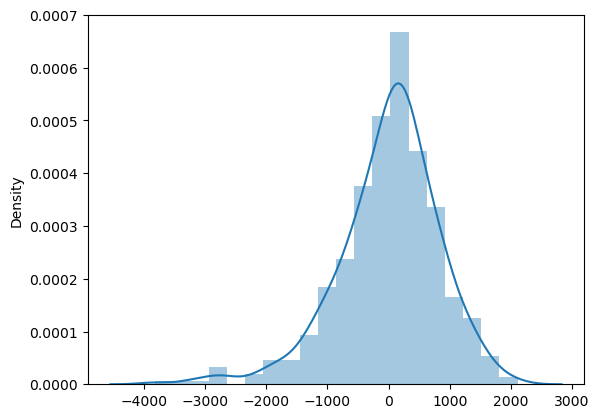

In [78]:
y_train_pred=lr10.predict(X_train_lm10)
res=y_train-y_train_pred
sns.distplot((res),bins=20)

<font color='purple'> We can see that the histogram is normally distibuted at mean 0 </font>

## Predict values for Test Data Set

In [79]:
# We will apply scaler() to all the numeric features of test dataset.
# Whatever model learned from training dataset , now we want the model to apply it on test dataset.

n_vars=['temp','atemp','windspeed','hum']
X_test[n_vars]=scaler.transform(X_test[n_vars]) # Test data will not fit, it will only be transformed.
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
148,0,0,1,0.758058,0.704203,0.843709,0.479765,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
302,0,0,1,0.324018,0.317998,0.642765,0.386287,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
355,0,0,0,0.453814,0.455552,0.780592,0.062325,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0,0,1,0.497426,0.488701,0.856161,0.590357,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
532,1,0,1,0.664605,0.647005,0.617003,0.306856,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
558,1,0,0,0.838014,0.772963,0.500644,0.146420,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
137,0,0,1,0.611648,0.588177,0.896522,0.448592,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
# columns from our final dataset
cols=['yr','temp','season_spring','season_winter','mnth_mar','mnth_sep','weathersit_bad','weathersit_moderate']
#y_test_pred=lr10.predict(X_test)
r2_score(y_train, y_train_pred)

0.8148736276303421

<h4>We can see we are getting a r2 score of 0.81487 which is very near to our r2 sore of 0.815 , so it is working nicely on test data also.<h4>

## FINAL EVALUATION

<font color='purple'> From our coefficients in final model 10 we can say that our top 3 predictors are:
    <br> 1. Temp- Temperature increase will increase the  bike hire numbers by 3611
    <br> 2. yr- Increase in yr will increase the bike hire numbers by 1987
    <br> 3. Weathersit_bad- Increase in bad weather will decrease the bike hire numbers by 2343
    </font>